<a href="https://colab.research.google.com/github/catafest/colab_google/blob/master/catafest_067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install numpy

In [6]:
!pip install Pillow

In [7]:
!pip install tensorflow

Saving download_001.png to download_001 (3).png
Saving download_002.png to download_002 (3).png
Uploaded files: download_001 (3).png, download_002 (3).png


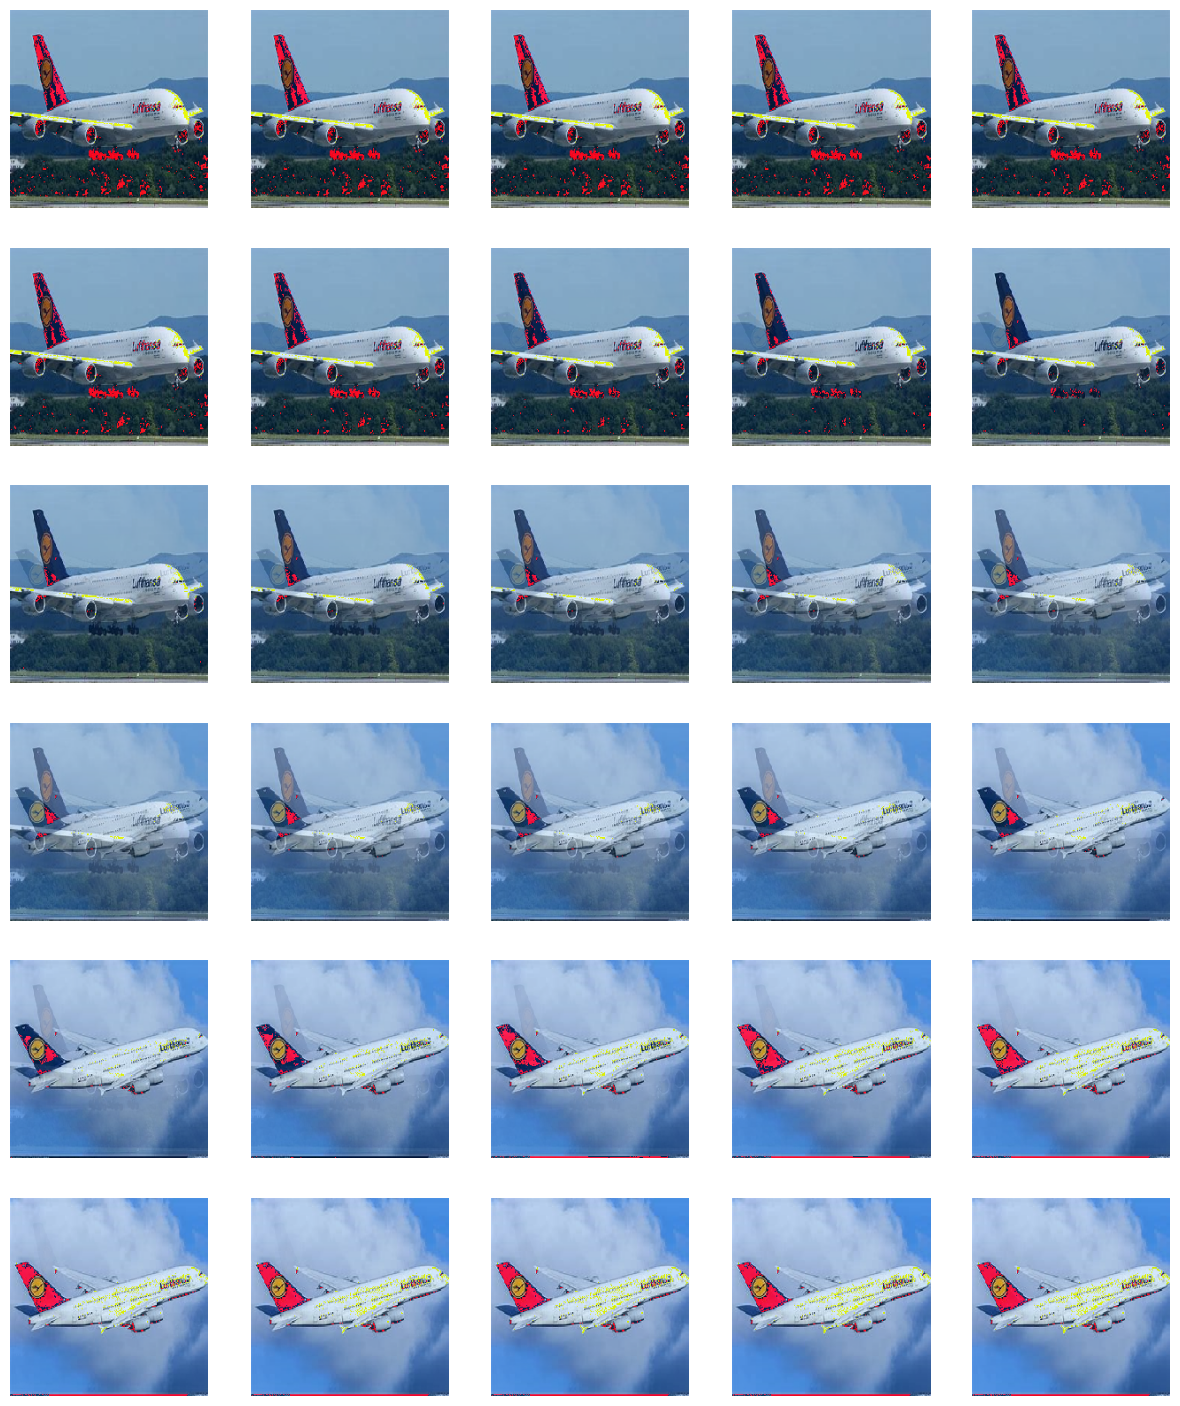

Intermediate images saved to the local desktop.


In [10]:
from google.colab import files
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the VGG16 model
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define a function to upload images from the local desktop to Google Colab
def upload_images():
    uploaded = files.upload()
    for filename, data in uploaded.items():
        with open(filename, 'wb') as f:
            f.write(data)
    print(f"Uploaded files: {', '.join(uploaded.keys())}")
    return uploaded.keys()

# Define a function to reverse the preprocessing applied by VGG16
def reverse_preprocess_input(x):
    # 'RGB'->'BGR'
    x = x[..., ::-1]
    # Zero-center by mean pixel
    x[..., 0] += 103.939
    x[..., 1] += 116.779
    x[..., 2] += 123.68
    return x


# Define a function to generate intermediate images between two images with smooth transition
def generate_intermediate_images(img1_path, img2_path, num_frames=30):
    # Load the two images
    img1 = load_img(img1_path, target_size=(224, 224))
    img2 = load_img(img2_path, target_size=(224, 224))

    # Convert the images to numpy arrays
    img1_array = img_to_array(img1)
    img2_array = img_to_array(img2)

    # Preprocess the images
    img1_array = preprocess_input(img1_array)
    img2_array = preprocess_input(img2_array)

    # Generate the intermediate images with smooth transition
    intermediate_images = []
    for i in range(num_frames):
        # Apply easing function for smoother transition (e.g., sigmoid)
        alpha = 1 / (1 + np.exp(-(i - num_frames / 2) / (num_frames / 10)))
        intermediate_image = (1 - alpha) * img1_array + alpha * img2_array
        intermediate_images.append(intermediate_image)

    return intermediate_images

# Example usage
uploaded_files = upload_images()
if len(uploaded_files) >= 2:
    img1_path = list(uploaded_files)[0] # Directly access the list of keys
    img2_path = list(uploaded_files)[1] # Directly access the list of keys

    # Generate 30 frames for the transition
    intermediate_images = generate_intermediate_images(img1_path, img2_path, num_frames=30)

    # Display the intermediate images
    fig, axes = plt.subplots(6, 5, figsize=(15, 18)) # Adjusted for 30 frames
    for i, img in enumerate(intermediate_images):
        row = i // 5
        col = i % 5
        # Reverse preprocessing before displaying
        display_img = reverse_preprocess_input(img.copy())
        axes[row, col].imshow(display_img.astype(np.uint8))
        axes[row, col].axis('off')
    plt.show()

    # Download the intermediate images
    for i, img in enumerate(intermediate_images):
        # Reverse preprocessing before saving
        save_img = reverse_preprocess_input(img.copy())
        plt.imsave(f"intermediate_image_{i+1}.jpg", save_img.astype(np.uint8))
    print("Intermediate images saved to the local desktop.")
else:
    print("Please upload at least two images.")